
WeatherPy
Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

#CSV Import
city_data_df = pd.read_csv("cities2.csv")

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key #### Add your own key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

Generate the Cities List by Using the citipy Library¶

In [85]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

lnts =[]
lngs = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
# lnts=city_data_df["Lat"]
# lngs=city_data_df["Lng"]

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 636


Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude
Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [86]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []
city_data = []
city_lng = []
city_max_temp = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")

   # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | sangin
Processing Record 3 of Set 1 | acapulco
Processing Record 4 of Set 1 | saint george
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | kieta
Processing Record 7 of Set 1 | pachavita
Processing Record 8 of Set 1 | nizhniy lomov
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | bud
Processing Record 11 of Set 1 | matay
Processing Record 12 of Set 1 | lingao
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | hofn
Processing Record 17 of Set 1 | dingle
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | acarau
Processing Record 20 of Set 1 | flinders
Processing Record 21 of Set 1 | east london
Processing Record 22 of Set 1 | tuatapere
Processing Record 23 of Set 1 | bredasdorp
Processing Re

In [87]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [107]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Hithadhoo,-0.6000,73.0833,80.89,74,75,9.22,MV,2023-01-26 01:07:35
1,Sangin,32.0728,64.8359,34.52,52,0,4.92,AF,2023-01-26 01:09:01
2,Acapulco,16.8634,-99.8901,80.42,74,0,8.05,MX,2023-01-26 01:05:16
3,Saint George,37.1041,-113.5841,45.25,37,0,19.57,US,2023-01-26 01:04:55
4,Albany,42.6001,-73.9662,36.05,89,100,1.99,US,2023-01-26 01:06:34


In [108]:
# Export the City_Data into a csv
city_data_df.to_csv("random_cities.csv", index_label="City_ID")

In [90]:
# Read saved data
city_data_df = pd.read_csv("cities3.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Hithadhoo,-0.6000,73.0833,80.89,74,75,9.22,MV,2023-01-26 01:07:35
1,Sangin,32.0728,64.8359,34.52,52,0,4.92,AF,2023-01-26 01:09:01
2,Acapulco,16.8634,-99.8901,80.42,74,0,8.05,MX,2023-01-26 01:05:16
3,Saint George,37.1041,-113.5841,45.25,37,0,19.57,US,2023-01-26 01:04:55
4,Albany,42.6001,-73.9662,36.05,89,100,1.99,US,2023-01-26 01:06:34


Create the Scatter Plots Requested
Latitude Vs. Temperature¶


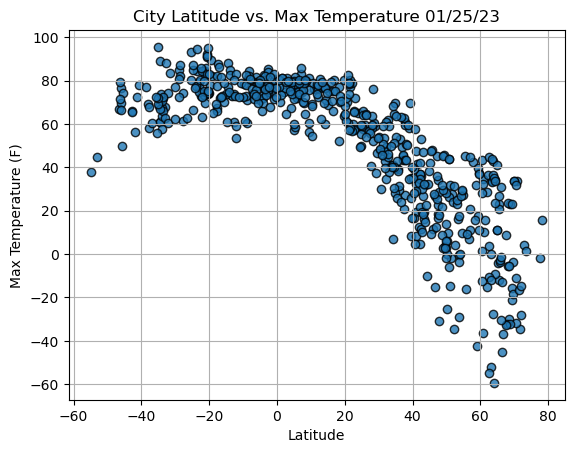

In [109]:
#Graph Values
lats = city_data_df["Lat"]
temps = city_data_df["Max Temp"]

# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

Latitude Vs. Humidity

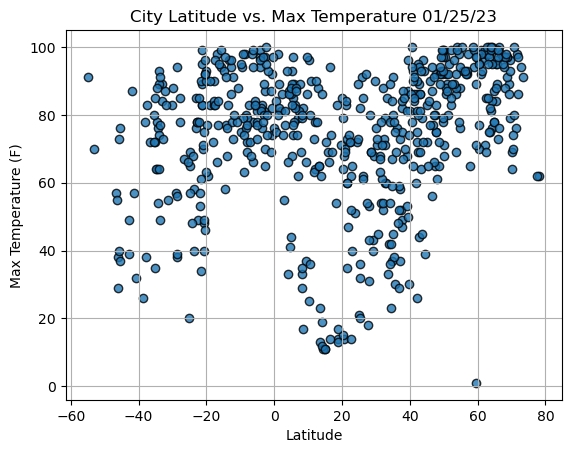

In [110]:
#Graph Values
lats = city_data_df["Lat"]
humidity = city_data_df["Humidity"]

# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

Latitude Vs. Cloudiness

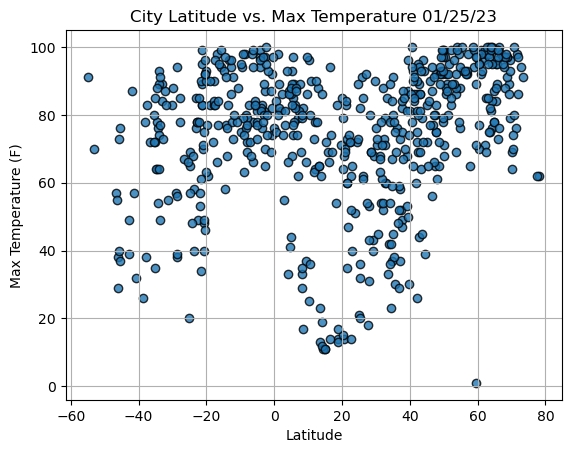

In [111]:
#Graph Values
lats = city_data_df["Lat"]
clouds = city_data_df["Wind Speed"]

# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

Latitude vs. Wind Speed Plot

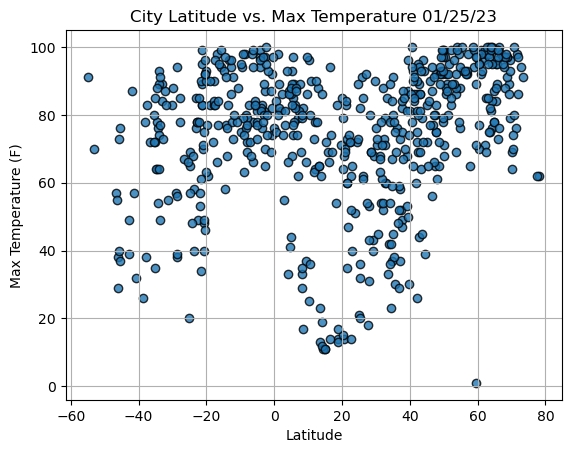

In [112]:
#Graph Values
lats = city_data_df["Lat"]
clouds = city_data_df["Cloudiness"]

# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

Requirement 2: Compute Linear Regression for Each Relationship

In [113]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_val, y_val, title, y_label, text_coords)

SyntaxError: invalid syntax (558942873.py, line 2)

In [114]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Sangin,32.0728,64.8359,34.52,52,0,4.92,AF,2023-01-26 01:09:01
2,Acapulco,16.8634,-99.8901,80.42,74,0,8.05,MX,2023-01-26 01:05:16
3,Saint George,37.1041,-113.5841,45.25,37,0,19.57,US,2023-01-26 01:04:55
4,Albany,42.6001,-73.9662,36.05,89,100,1.99,US,2023-01-26 01:06:34
6,Pachavita,5.1397,-73.3974,57.06,93,76,1.28,CO,2023-01-26 01:09:02


In [97]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Sangin,32.0728,64.8359,34.52,52,0,4.92,AF,2023-01-26 01:09:01
2,Acapulco,16.8634,-99.8901,80.42,74,0,8.05,MX,2023-01-26 01:05:16
3,Saint George,37.1041,-113.5841,45.25,37,0,19.57,US,2023-01-26 01:04:55
4,Albany,42.6001,-73.9662,36.05,89,100,1.99,US,2023-01-26 01:06:34
6,Pachavita,5.1397,-73.3974,57.06,93,76,1.28,CO,2023-01-26 01:09:02


Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.6873251641160694


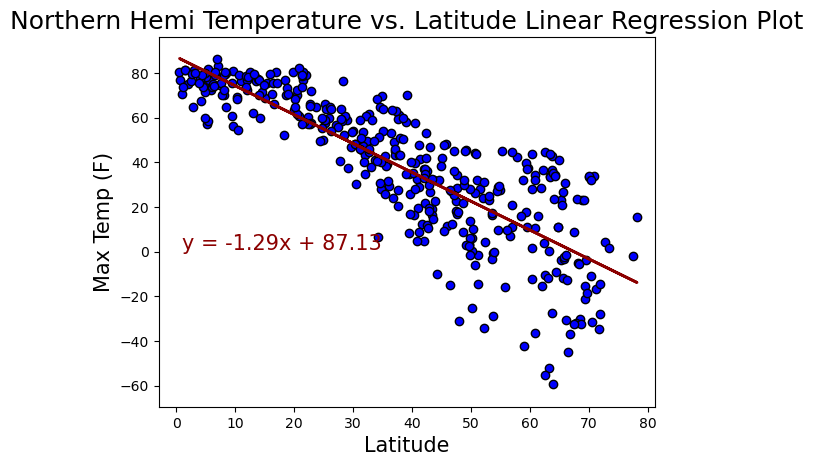

In [98]:
# Linear regression on Northern Hemisphere
# Build scatter plot for each data type:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, color="blue", edgecolors="black")
plt.plot(x_values,regress_values, "darkred", linewidth=2)

plt.title("Northern Hemi Temperature vs. Latitude Linear Regression Plot", fontsize=18)
plt.ylabel("Max Temp (F)", fontsize=15, color="black")
plt.xlabel("Latitude", fontsize=15, color="black")
plt.annotate(line_eq,(1, 1), fontsize=15, color="darkred")

plt.ylim(min(northern_hemi_df["Max Temp"])-10, max(northern_hemi_df["Max Temp"])+10)
plt.xlim(-3, max(northern_hemi_df["Lat"])+3)

plt.savefig("N_Hem_Temperature_vs._Latitude_Linear_Regression_Plot.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.6873251641160694


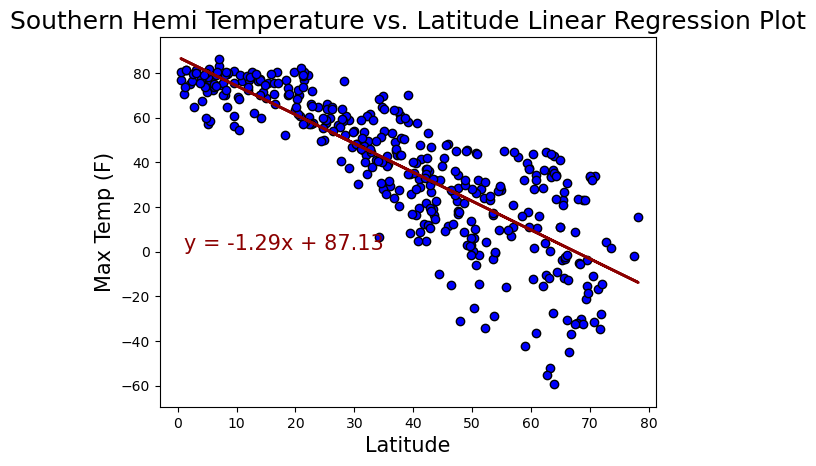

In [99]:
# Linear regression on Southern Hemisphere
# Build scatter plot for each data type:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, color="blue", edgecolors="black")
plt.plot(x_values,regress_values, "darkred", linewidth=2)

plt.title("Southern Hemi Temperature vs. Latitude Linear Regression Plot", fontsize=18)
plt.ylabel("Max Temp (F)", fontsize=15, color="black")
plt.xlabel("Latitude", fontsize=15, color="black")
plt.annotate(line_eq,(1, 1), fontsize=15, color="darkred")

plt.ylim(min(southern_hemi_df["Max Temp"])-10, max(southern_hemi_df["Max Temp"])+10)
plt.xlim(-3, max(southern_hemi_df["Lat"])+3)

plt.savefig("S_Hem_Temperature_vs._Latitude_Linear_Regression_Plot.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

Discussion about the linear relationship: YOUR RESPONSE HERE

Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.15557283873007569


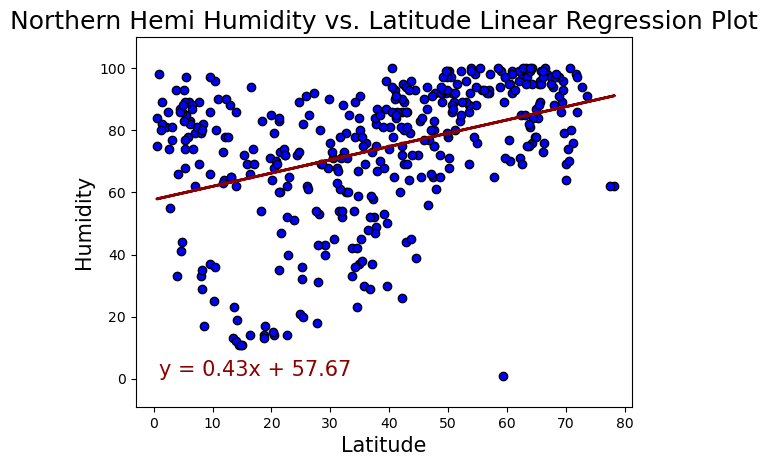

In [100]:
# Northern Hemisphere
# Build scatter plot for each data type:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, color="blue", edgecolors="black")
plt.plot(x_values,regress_values, "darkred", linewidth=2)

plt.title("Northern Hemi Humidity vs. Latitude Linear Regression Plot", fontsize=18)
plt.ylabel("Humidity", fontsize=15, color="black")
plt.xlabel("Latitude", fontsize=15, color="black")
plt.annotate(line_eq,(1, 1), fontsize=15, color="darkred")

plt.ylim(min(northern_hemi_df["Humidity"])-10, max(northern_hemi_df["Humidity"])+10)
plt.xlim(-3, max(northern_hemi_df["Lat"])+3)

plt.savefig("N_Hem_Humidity_vs._Latitude_Linear_Regression_Plot.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.15557283873007569


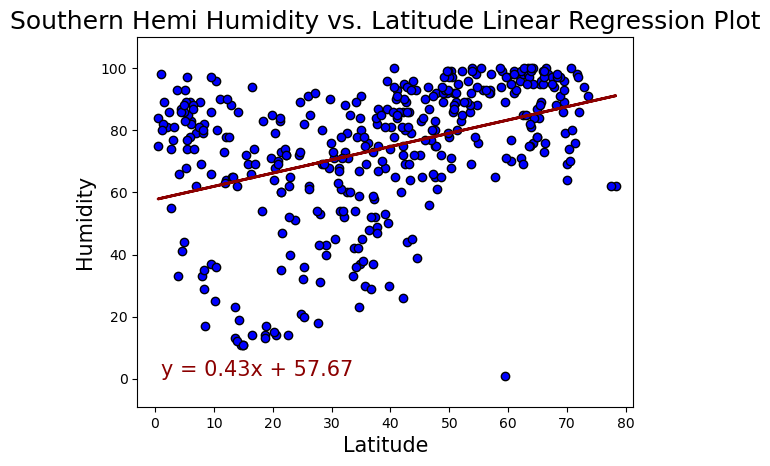

In [101]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, color="blue", edgecolors="black")
plt.plot(x_values,regress_values, "darkred", linewidth=2)

plt.title("Southern Hemi Humidity vs. Latitude Linear Regression Plot", fontsize=18)
plt.ylabel("Humidity", fontsize=15, color="black")
plt.xlabel("Latitude", fontsize=15, color="black")
plt.annotate(line_eq,(1, 1), fontsize=15, color="darkred")

plt.ylim(min(southern_hemi_df["Humidity"])-10, max(southern_hemi_df["Humidity"])+10)
plt.xlim(-3, max(southern_hemi_df["Lat"])+3)

plt.savefig("S_Hem_Humidity_vs._Latitude_Linear_Regression_Plot.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

Discussion about the linear relationship: YOUR RESPONSE HERE

Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0682517758486814


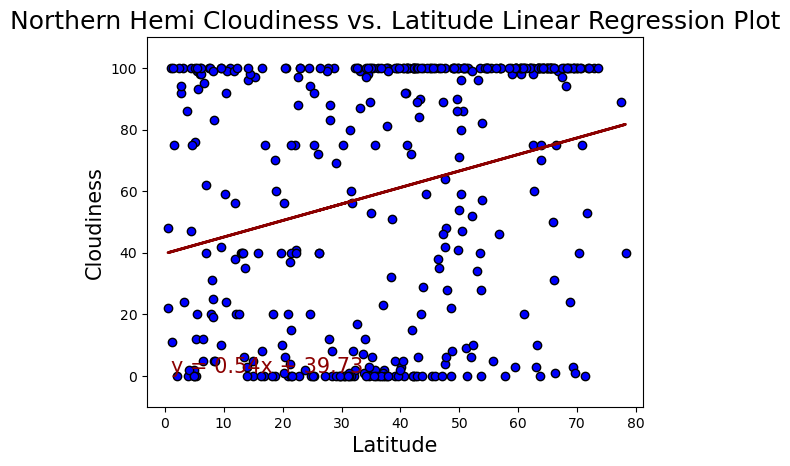

In [102]:
# Northern Hemisphere
# Build scatter plot for each data type:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, color="blue", edgecolors="black")
plt.plot(x_values,regress_values, "darkred", linewidth=2)

plt.title("Northern Hemi Cloudiness vs. Latitude Linear Regression Plot", fontsize=18)
plt.ylabel("Cloudiness", fontsize=15, color="black")
plt.xlabel("Latitude", fontsize=15, color="black")
plt.annotate(line_eq,(1, 1), fontsize=15, color="darkred")

plt.ylim(min(northern_hemi_df["Cloudiness"])-10, max(northern_hemi_df["Cloudiness"])+10)
plt.xlim(-3, max(northern_hemi_df["Lat"])+3)

plt.savefig("N_Hem_Cloudiness_vs._Latitude_Linear_Regression_Plot.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0682517758486814


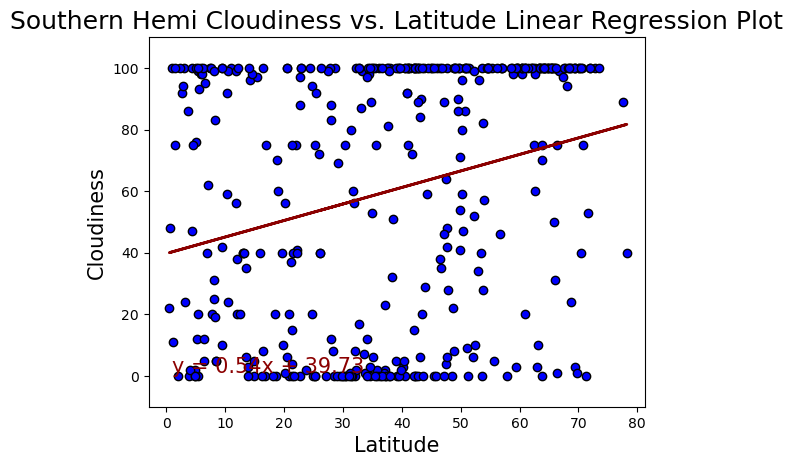

In [103]:
# Southern Hemisphere
# Build scatter plot for each data type:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, color="blue", edgecolors="black")
plt.plot(x_values,regress_values, "darkred", linewidth=2)

plt.title("Southern Hemi Cloudiness vs. Latitude Linear Regression Plot", fontsize=18)
plt.ylabel("Cloudiness", fontsize=15, color="black")
plt.xlabel("Latitude", fontsize=15, color="black")
plt.annotate(line_eq,(1, 1), fontsize=15, color="darkred")

plt.ylim(min(southern_hemi_df["Cloudiness"])-10, max(southern_hemi_df["Cloudiness"])+10)
plt.xlim(-3, max(southern_hemi_df["Lat"])+3)

plt.savefig("S_Hem_Cloudiness_vs._Latitude_Linear_Regression_Plot.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

Discussion about the linear relationship: YOUR RESPONSE HERE

Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.014390355723255439


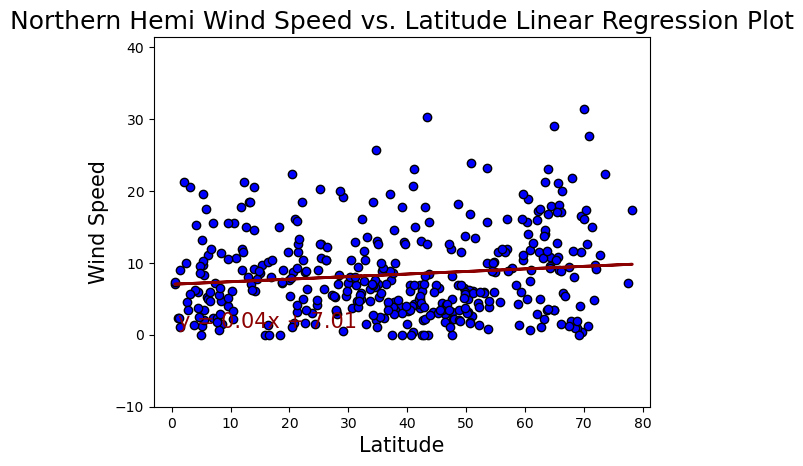

In [104]:
# Northern Hemisphere
# Build scatter plot for each data type:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, color="blue", edgecolors="black")
plt.plot(x_values,regress_values, "darkred", linewidth=2)

plt.title("Northern Hemi Wind Speed vs. Latitude Linear Regression Plot", fontsize=18)
plt.ylabel("Wind Speed", fontsize=15, color="black")
plt.xlabel("Latitude", fontsize=15, color="black")
plt.annotate(line_eq,(1, 1), fontsize=15, color="darkred")

plt.ylim(min(northern_hemi_df["Wind Speed"])-10, max(northern_hemi_df["Wind Speed"])+10)
plt.xlim(-3, max(northern_hemi_df["Lat"])+3)

plt.savefig("N_Hem_Wind_Speed_vs._Latitude_Linear_Regression_Plot.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.014390355723255439


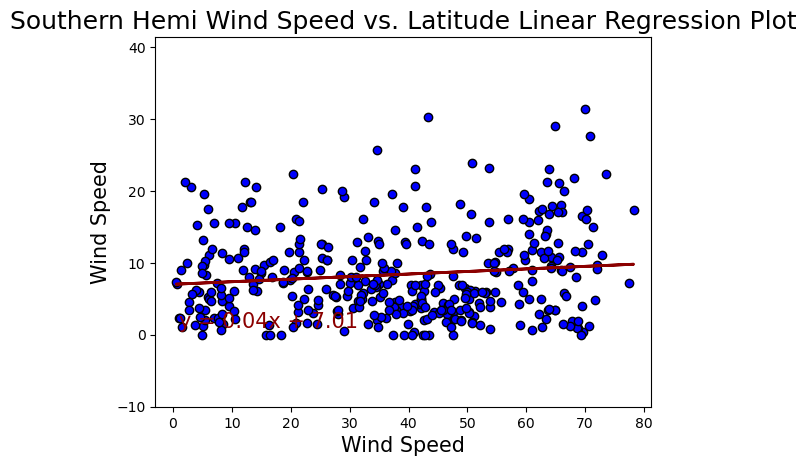

In [105]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, color="blue", edgecolors="black")
plt.plot(x_values,regress_values, "darkred", linewidth=2)

plt.title("Southern Hemi Wind Speed vs. Latitude Linear Regression Plot", fontsize=18)
plt.ylabel("Wind Speed", fontsize=15, color="black")
plt.xlabel("Wind Speed", fontsize=15, color="black")
plt.annotate(line_eq,(1, 1), fontsize=15, color="darkred")

plt.ylim(min(southern_hemi_df["Wind Speed"])-10, max(southern_hemi_df["Wind Speed"])+10)
plt.xlim(-3, max(southern_hemi_df["Lat"])+3)

plt.savefig("S_Hem_Wind_Speed_vs._Latitude_Linear_Regression_Plot.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()